In [7]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../..") 

from src.data_loaders.rollcall import get_cleaned_rollcall_data, get_rollcall_data_crs_policy_areas

[autoreload of src.data_loaders.utils failed: Traceback (most recent call last):
  File "/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 483, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/__init__.py", line 129, in reload
    _bootstrap._exec(spec, module)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 1022, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/notebo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd

In [9]:
df = get_cleaned_rollcall_data()

# need to handle codes and policy areas
# first pass let's just use the crs_policy_area
policy_areas = df["crs_policy_area"].str.lower().str.strip().str.replace(" ", "_").str.replace(",", "").str.replace(".", "")
policies = policy_areas.unique()

print(policies)
dummies = pd.get_dummies(policy_areas)

df = df.join(pd.get_dummies(policy_areas)).drop(columns="crs_policy_area")
df.shape

Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_cleaned_11.parquet
['immigration' 'public_lands_and_natural_resources'
 'government_operations_and_politics' 'science_technology_communications'
 'labor_and_employment' 'energy' 'arts_culture_religion'
 'agriculture_and_food' 'foreign_trade_and_international_finance'
 'transportation_and_public_works' 'international_affairs'
 'environmental_protection' 'families' 'economics_and_public_finance'
 'crime_and_law_enforcement' 'commerce' 'finance_and_financial_sector'
 'emergency_management' 'social_welfare'
 'civil_rights_and_liberties_minority_issues' 'health' 'education'
 'native_americans' 'armed_forces_and_national_security'
 'housing_and_community_development' 'animals'
 'water_resources_development' 'law' 'taxation' 'sports_and_recreation'
 'congress' 'social_sciences_and_history']


(11324, 56)

In [4]:
assert df[[*policy_areas.unique()]].sum(axis=1).max() == 1

<Axes: >

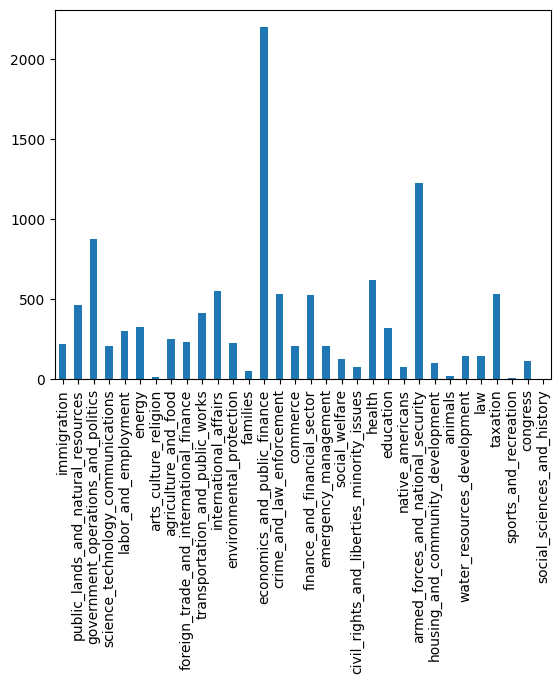

In [5]:
df[policies].sum().plot.bar()

<Axes: >

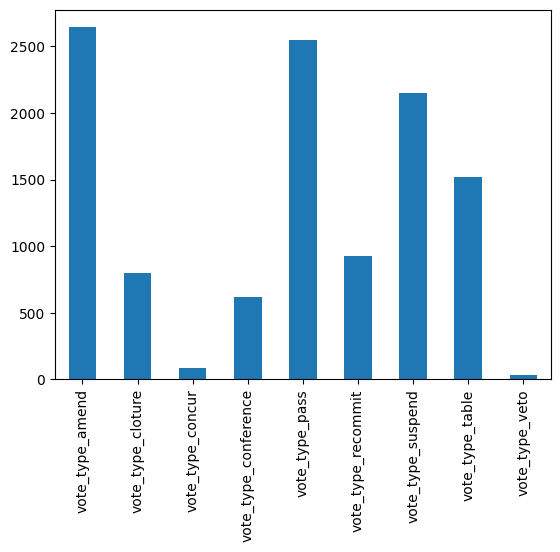

In [9]:
df[[c for c in df.columns if c.startswith("vote_type_")]].sum().plot.bar()

In [2]:
# we can encode chamber as 0 for the house, 1 for the senate
df["chamber"].unique()

NameError: name 'df' is not defined

In [5]:


df = get_rollcall_data_crs_policy_areas()

Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_crs_policy_4.parquet


In [6]:
df

,chamber,vote_passed,vote_type_amend,vote_type_cloture,vote_type_concur,vote_type_conference,vote_type_pass,vote_type_recommit,vote_type_suspend,vote_type_table,...,crs_policy_area_law,crs_policy_area_native_americans,crs_policy_area_public_lands_and_natural_resources,crs_policy_area_science_technology_communications,crs_policy_area_social_sciences_and_history,crs_policy_area_social_welfare,crs_policy_area_sports_and_recreation,crs_policy_area_taxation,crs_policy_area_transportation_and_public_works,crs_policy_area_water_resources_development
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11320,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11321,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11322,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
